In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Read datasets

In [2]:
true = pd.read_csv(('True.csv'))
fake = pd.read_csv(('Fake.csv'))

In [3]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
true.shape

(21417, 4)

In [5]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [6]:
fake.shape

(23481, 4)

Data cleaning and preparation

In [7]:
# Drop unnecessary columns

true.drop(columns=['subject','date'],inplace = True)
fake.drop(columns=['subject','date'],inplace = True)

In [8]:
# set label 1 for true news & 0 for fake news
true['label']=1
fake['label']=0

In [9]:
# check missing values
true.isnull().sum()

title    0
text     0
label    0
dtype: int64

In [10]:
# check missing values
fake.isnull().sum()

title    0
text     0
label    0
dtype: int64

In [11]:
# Concatenate dataframes
new_dataset = pd.concat([fake, true]).reset_index(drop = True)
new_dataset.shape

(44898, 3)

In [12]:
# Shuffle the data

from sklearn.utils import shuffle
new_dataset = shuffle(new_dataset)
new_dataset = new_dataset.reset_index(drop=True)

In [13]:
# Check the data
new_dataset.head()

,title,text,label
0,SHOCKER! BRATTY KID WHO SAID “Screw Our Presid...,"Immediately after this happened, Charles Kraut...",0
1,"SHERIFFS, LT. GOV AND IMMIGRATION EXPERTS FIGH...","Hello America Are we awake yet?AUSTIN, Texas ...",0
2,New York's Cuomo proposes $145.3 billion budge...,"ALBANY, N.Y. (Reuters) - New York Governor And...",1
3,Jeb Bush Cherishes A Secret Ambition — And No...,"Jeb Bush was, once upon a time in a land far, ...",0
4,YOU CAN THANK OBAMA FOR THIS: Black Woman Spit...,You can blame Obama for the hatred and divisio...,0


In [14]:
# merge title & text both columns

new_dataset['text'] = new_dataset['title'] + ' ' + new_dataset['text']
new_dataset.drop(columns=['title'],inplace = True)
new_dataset.head()

,text,label
0,SHOCKER! BRATTY KID WHO SAID “Screw Our Presid...,0
1,"SHERIFFS, LT. GOV AND IMMIGRATION EXPERTS FIGH...",0
2,New York's Cuomo proposes $145.3 billion budge...,1
3,Jeb Bush Cherishes A Secret Ambition — And No...,0
4,YOU CAN THANK OBAMA FOR THIS: Black Woman Spit...,0


In [15]:
# Convert to lowercase


new_dataset['text'] = new_dataset['text'].apply(lambda x: x.lower())
new_dataset.head()

,text,label
0,shocker! bratty kid who said “screw our presid...,0
1,"sheriffs, lt. gov and immigration experts figh...",0
2,new york's cuomo proposes $145.3 billion budge...,1
3,jeb bush cherishes a secret ambition — and no...,0
4,you can thank obama for this: black woman spit...,0


In [16]:
# Remove punctuation

import string


def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

new_dataset['text'] = new_dataset['text'].apply(punctuation_removal)

In [17]:
# Check
new_dataset.head()

,text,label
0,shocker bratty kid who said “screw our preside...,0
1,sheriffs lt gov and immigration experts fight ...,0
2,new yorks cuomo proposes 1453 billion budget c...,1
3,jeb bush cherishes a secret ambition — and no...,0
4,you can thank obama for this black woman spits...,0


In [18]:
# Removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

new_dataset['text'] = new_dataset['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Error loading stopwords: <urlopen error [WinError 10051] A
[nltk_data]     socket operation was attempted to an unreachable
[nltk_data]     network>


In [19]:
new_dataset.head()

,text,label
0,shocker bratty kid said “screw president” drew...,0
1,sheriffs lt gov immigration experts fight back...,0
2,new yorks cuomo proposes 1453 billion budget c...,1
3,jeb bush cherishes secret ambition — it’s potu...,0
4,thank obama black woman spits trump supporter’...,0


Basic data exploration

In [20]:
import sys
print(sys.executable)

D:\anaconda3\python.exe


In [21]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


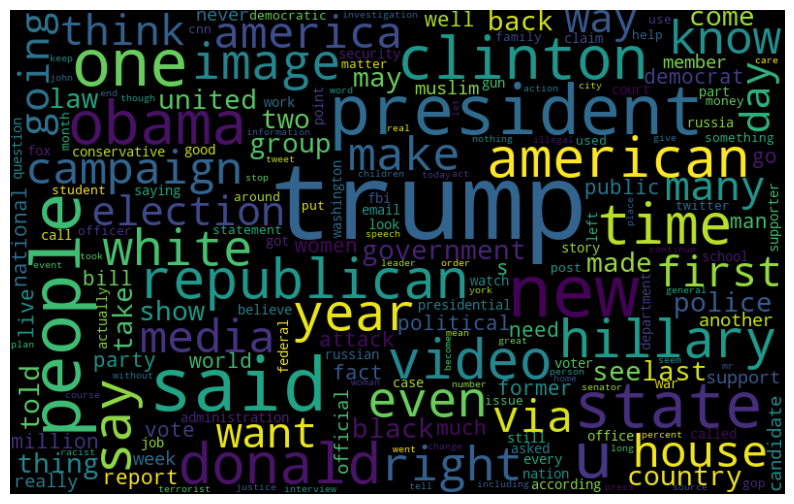

In [22]:
# Word cloud for fake news
from wordcloud import WordCloud

fake_data = new_dataset[new_dataset["label"] == 0]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

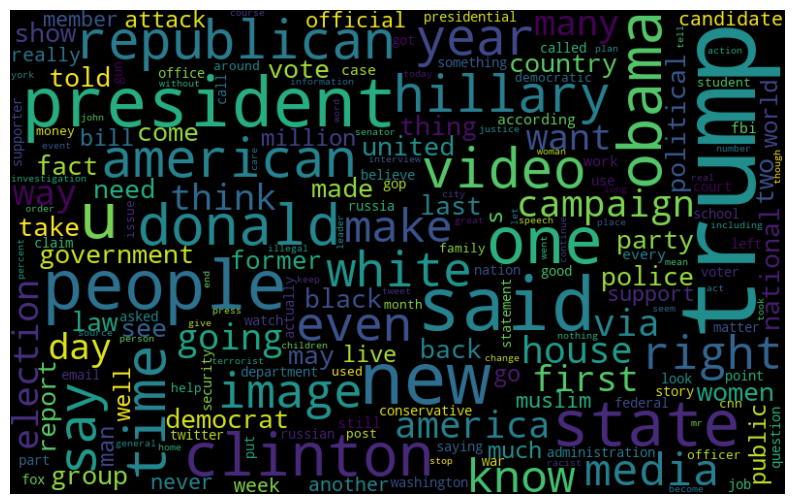

In [23]:
# Word cloud for real news
from wordcloud import WordCloud

real_data = new_dataset[new_dataset["label"] == 1]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [24]:
# Most frequent words counter (Code adapted from https://www.kaggle.com/rodolfoluna/fake-news-detector)   
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

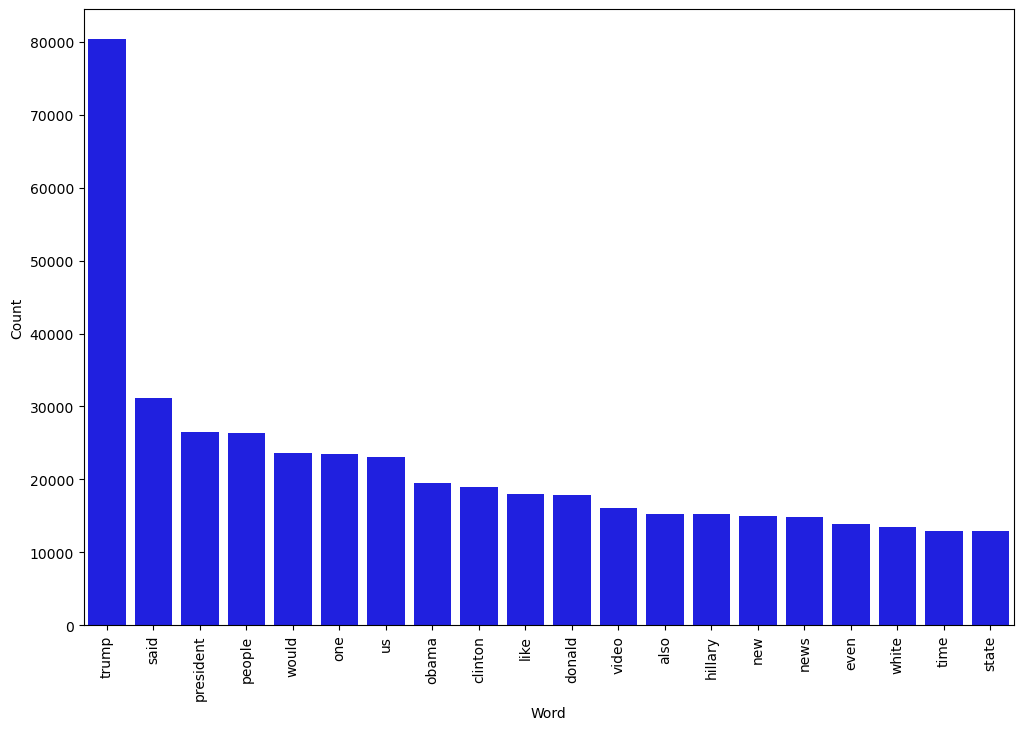

In [25]:
# Most frequent words in fake news
counter(new_dataset[new_dataset["label"] == 0], "text", 20)

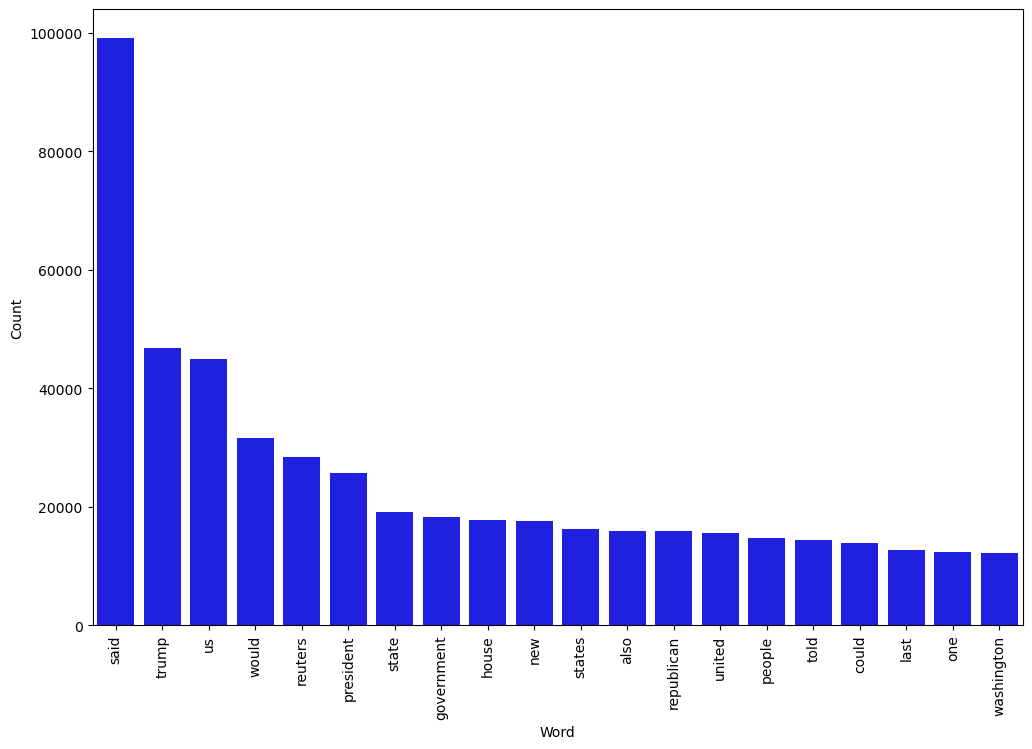

In [26]:
# Most frequent words in real news
counter(new_dataset[new_dataset["label"] == 1], "text", 20)

Modeling

In [27]:
# Function to plot the confusion matrix (code from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Model selection and Evaluation

In [28]:
# Split the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(new_dataset['text'], new_dataset.label, test_size=0.2, random_state=42)

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score

Naive Bayes

In [30]:
dct = dict()

from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', NB_classifier)])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

dct['Naive Bayes'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 94.96%


Confusion matrix, without normalization


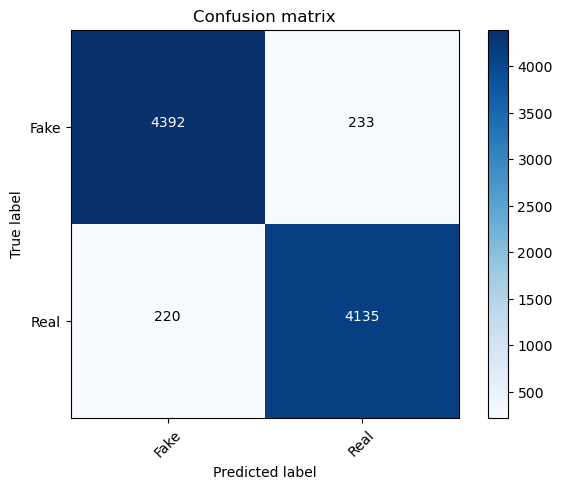

In [31]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

Logistic regression

In [32]:
# Vectorizing and applying TF-IDF
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Logistic Regression'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 98.96%


Confusion matrix, without normalization


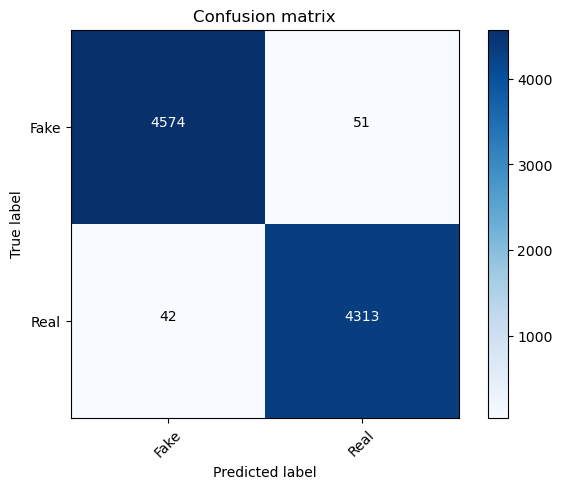

In [33]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Decision Tree'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 99.65%


Confusion matrix, without normalization


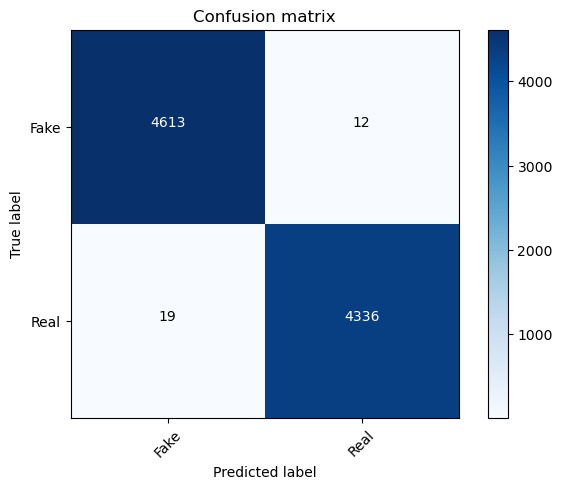

In [35]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Random Forest'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 99.01%


Confusion matrix, without normalization


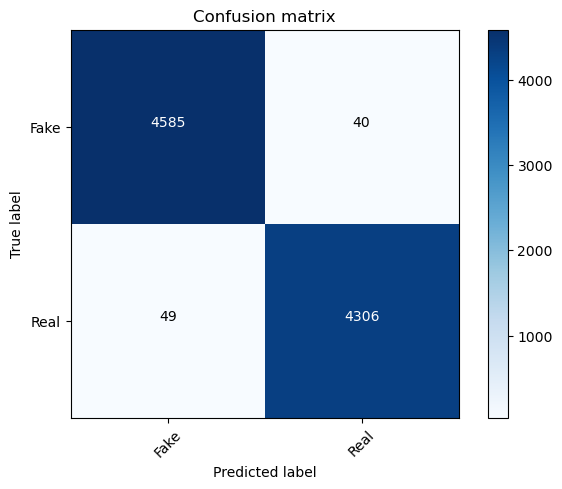

In [37]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

Comparing Different Models

In [ ]:
plt.figure(figsize=(8,7))
plt.bar(list(dct.keys()),list(dct.values()))
plt.ylim(90,100)
plt.yticks((91, 92, 93, 94, 95, 96, 97, 98, 99, 100))